In [1]:
from histopy.GLCM import hidel_glcm, gray_255_scale
from histopy.features import *

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave
from skimage.io import imread_collection, imread
import os

from skimage.color import rgb2gray

#your path 
DIR = 'images/red/*.png'

%matplotlib inline

In [7]:
images = imread_collection(DIR)

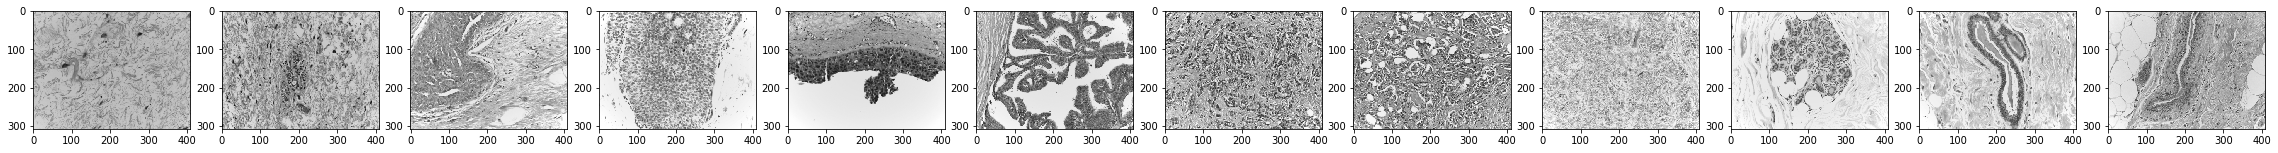

In [27]:
fig, ax = plt.subplots(1, 12, figsize=(40,40))

for i, image in enumerate(images):
    ax[i].imshow(image, cmap='gray')

In [18]:
glcm_images = []

for i in range(len(images)):
    print("Imagem {}...".format(i+1))
    # Convertendo para Gray
    gray_im = rgb2gray(images[i])
    
    # Convertendo para escala de 0 a 255 e aplicando o GLCM normalizado
    glcm = hidel_glcm(gray_255_scale(gray_im), normalize=True)
    
    # Adicionando os feature na lista
    glcm_images.append([uniformity(np.array(glcm)), entropy(np.array(glcm)), contrast(np.array(glcm)), correlation(np.array(glcm)), variance(np.array(glcm)), homogeneity(np.array(glcm))])

Imagem 1...
Imagem 2...
Imagem 3...
Imagem 4...
Imagem 5...
Imagem 6...
Imagem 7...
Imagem 8...
Imagem 9...
Imagem 10...
Imagem 11...
Imagem 12...


In [13]:
import pandas as pd

In [20]:
columns = ['uniformity', 'entropy', 'contrast', 'correlation', 'variance', 'homogeneity']
data = pd.DataFrame(glcm_images,columns=columns)
data

,uniformity,entropy,contrast,correlation,variance,homogeneity
0,19.744747,166.064441,2.137681e+04,1.073945e+11,129.376687,26.716520
1,28.779653,482.961417,2.064267e+05,4.582401e+10,346.487606,36.275040
2,13.952785,337.497953,7.780477e+04,6.316999e+10,217.884975,31.493488
3,7.183820,94.032456,2.217335e+04,4.744648e+11,48.495703,14.236641
4,10.450516,85.783295,1.053281e+04,3.016914e+11,52.280901,21.258095
5,4.526559,110.736534,3.431564e+04,5.564480e+11,52.853816,11.717748
6,414.996796,2130.502759,3.163088e+06,1.442072e+10,2195.944706,124.393567
7,3.772060,281.947206,1.568115e+05,1.967304e+11,136.762546,13.331759
8,89.549285,807.858166,4.357159e+05,3.194186e+10,732.966385,58.099772
9,6.521904,84.924105,1.634029e+04,6.494133e+11,48.308665,14.516467
